In [1]:
#test for T13
import numpy as np
from LayerModel import rfmini
from obspy.io.sac.sactrace import SACTrace
import os
import numpy as np
from scipy import signal
from scipy.signal import firwin, filtfilt
import matplotlib.pyplot as plt
from obspy import read
from glob import glob

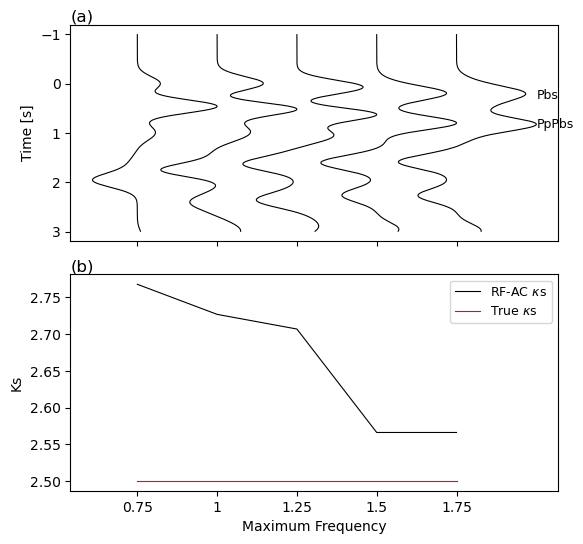

In [2]:

#parameters for source time function
from matplotlib.pyplot import tight_layout

datadir = "synthetic_data_Svary/Varyp_sediment_crust_mantle_synthetics_c35_ks2.5_dt0.01/sediments_depth1"

fig, axs = plt.subplots(2,1, sharex=True,figsize=(15/2.54,14/2.54),tight_layout=True)
ax1 = axs[0]
ax2 = axs[1]
plt.rcParams.update({"font.size":9})
pltlength=3
depth=1
freqs = [0.75,1,1.25,1.5,1.75]
for yy,freq in enumerate(freqs):
    st = read(f"{datadir}/ray0.04042_f{freq:3.2f}.Rsn.SAC_g5")
    tr = st[0]
    dt = tr.stats.delta
    rf = tr.data
    times = np.arange(len(rf))*dt-5
    index = np.logical_and(times>-1,times<pltlength)
    rf = rf[index]
    rf = rf/rf.max()
    times = times[index]
    ax1.plot(rf+yy,times,lw=0.8,color='k')

ax1.text(5,0.3,"Pbs")
ax1.text(5,0.9,"PpPbs")

# st = read(f"{datadir}/ray0.04042.R.SAC_g5")
# tr = st[0]
# dt = tr.stats.delta
# rf = tr.data
# times = np.arange(len(rf))*dt-5
# index = np.logical_and(times>-1,times<pltlength)
# rf = rf[index]
# rf = rf/rf.max()
# times = times[index]
# ax1.plot(rf+yy+1,times,lw=0.8,color='k')

ax1.set_xticks(np.arange(len(freqs)))
lables = [f"{freq}" for freq in freqs]
# lables.append('None')
ax1.set_xticklabels(lables,rotation=0)
# ax1.set_xlabel("Gaussian parameters")
ax1.set_ylabel("Time [s]")
ax1.invert_yaxis()
xmin,xmax = ax1.get_xlim()
ymin,ymax = ax1.get_ylim()
ax1.text(xmin,ymax,'(a)',fontsize=12,verticalalignment='bottom')


###plot Ks
results_ks = []
for freq in freqs:

    result_file = f"synthetic_data_Svary/Varyp_sediment_crust_mantle_synthetics_c35_ks2.5_dt0.01/Hkresults/sediments_depth1_sn_f{freq}/sediments_depth1_Hk_result.dat"
    data_RFAC = np.loadtxt(result_file,skiprows=1)
    Hs2 = data_RFAC[0,1]
    Ks2 = data_RFAC[0,2]
    Hm2 = data_RFAC[1,1]
    Km2 = data_RFAC[1,2]
    results_ks.append(Ks2)

# result_file = f"synthetic_data_Svary/Varyp_sediment_crust_mantle_synthetics_c35_ks2.5_dt0.01/Hkresults/sediments_depth1/sediments_depth1_Hk_result.dat"
# data_RFAC = np.loadtxt(result_file,skiprows=1)
# Hs2 = data_RFAC[0,1]
# Ks2 = data_RFAC[0,2]
# Hm2 = data_RFAC[1,1]
# Km2 = data_RFAC[1,2]
# results_ks.append(Ks2)


ax2.plot(np.arange(len(freqs)),np.array(results_ks),lw=0.8, color='k',label=r'RF-AC $\kappa$s')
ax2.plot(np.arange(len(freqs)),np.ones([len(freqs)])*2.5,lw=0.8, color='r',label=r'True $\kappa$s')

ax2.legend()
ax2.set_xticks(np.arange(len(freqs)))
lables = [f"{freq}" for freq in freqs]
# lables.append('None')
ax2.set_xticklabels(lables,rotation=0)
ax2.set_ylabel("Ks")
ax2.set_xlabel("Maximum Frequency")

xmin,xmax = ax2.get_xlim()
ymin,ymax = ax2.get_ylim()
ax2.text(xmin,ymax,'(b)',fontsize=12,verticalalignment='bottom')
plt.savefig("Figures/Vary_maxfreq_STF.jpg",dpi=900)
plt.show()


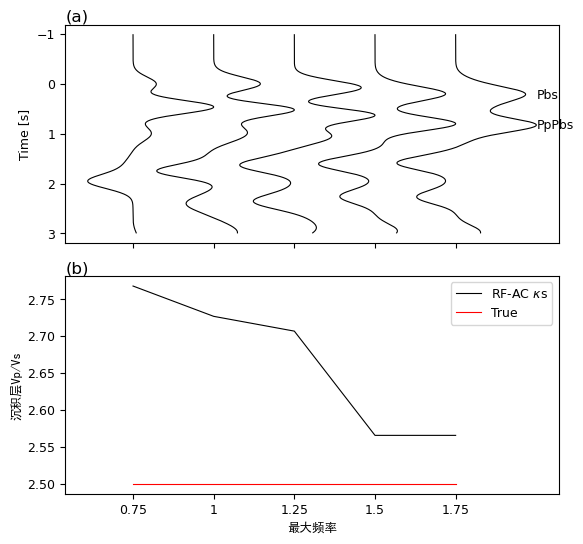

In [3]:

#parameters for source time function
from matplotlib.pyplot import tight_layout
from matplotlib.font_manager import FontProperties
zhfont1 = FontProperties(fname='/usr/share/fonts/font/simhei.ttf', size=9)


datadir = "synthetic_data_Svary/Varyp_sediment_crust_mantle_synthetics_c35_ks2.5_dt0.01/sediments_depth1"

fig, axs = plt.subplots(2,1, sharex=True,figsize=(15/2.54,14/2.54),tight_layout=True)
ax1 = axs[0]
ax2 = axs[1]
plt.rcParams.update({"font.size":9})
pltlength=3
depth=1
freqs = [0.75,1,1.25,1.5,1.75]
for yy,freq in enumerate(freqs):
    st = read(f"{datadir}/ray0.04042_f{freq:3.2f}.Rsn.SAC_g5")
    tr = st[0]
    dt = tr.stats.delta
    rf = tr.data
    times = np.arange(len(rf))*dt-5
    index = np.logical_and(times>-1,times<pltlength)
    rf = rf[index]
    rf = rf/rf.max()
    times = times[index]
    ax1.plot(rf+yy,times,lw=0.8,color='k')

ax1.text(5,0.3,"Pbs")
ax1.text(5,0.9,"PpPbs")

# st = read(f"{datadir}/ray0.04042.R.SAC_g5")
# tr = st[0]
# dt = tr.stats.delta
# rf = tr.data
# times = np.arange(len(rf))*dt-5
# index = np.logical_and(times>-1,times<pltlength)
# rf = rf[index]
# rf = rf/rf.max()
# times = times[index]
# ax1.plot(rf+yy+1,times,lw=0.8,color='k')

ax1.set_xticks(np.arange(len(freqs)))
lables = [f"{freq}" for freq in freqs]
# lables.append('None')
ax1.set_xticklabels(lables,rotation=0)
# ax1.set_xlabel("Gaussian parameters")
ax1.set_ylabel("Time [s]")
ax1.invert_yaxis()
xmin,xmax = ax1.get_xlim()
ymin,ymax = ax1.get_ylim()
ax1.text(xmin,ymax,'(a)',fontsize=12,verticalalignment='bottom')


###plot Ks
results_ks = []
for freq in freqs:

    result_file = f"synthetic_data_Svary/Varyp_sediment_crust_mantle_synthetics_c35_ks2.5_dt0.01/Hkresults/sediments_depth1_sn_f{freq}/sediments_depth1_Hk_result.dat"
    data_RFAC = np.loadtxt(result_file,skiprows=1)
    Hs2 = data_RFAC[0,1]
    Ks2 = data_RFAC[0,2]
    Hm2 = data_RFAC[1,1]
    Km2 = data_RFAC[1,2]
    results_ks.append(Ks2)

# result_file = f"synthetic_data_Svary/Varyp_sediment_crust_mantle_synthetics_c35_ks2.5_dt0.01/Hkresults/sediments_depth1/sediments_depth1_Hk_result.dat"
# data_RFAC = np.loadtxt(result_file,skiprows=1)
# Hs2 = data_RFAC[0,1]
# Ks2 = data_RFAC[0,2]
# Hm2 = data_RFAC[1,1]
# Km2 = data_RFAC[1,2]
# results_ks.append(Ks2)


ax2.plot(np.arange(len(freqs)),np.array(results_ks),lw=0.8, color='k',label=r'RF-AC $\kappa$s')
ax2.plot(np.arange(len(freqs)),np.ones([len(freqs)])*2.5,lw=0.8, color='r',label=r'True')

ax2.legend()
ax2.set_xticks(np.arange(len(freqs)))
lables = [f"{freq}" for freq in freqs]
# lables.append('None')
ax2.set_xticklabels(lables,rotation=0)
ax2.set_ylabel("沉积层Vp/Vs",font=zhfont1)
ax2.set_xlabel("最大频率",font=zhfont1)

xmin,xmax = ax2.get_xlim()
ymin,ymax = ax2.get_ylim()
ax2.text(xmin,ymax,'(b)',fontsize=12,verticalalignment='bottom')
plt.savefig("Figures/Vary_maxfreq_STF_Chineselabels.jpg",dpi=900)
plt.show()